<a href="https://colab.research.google.com/github/aukabir/Machine_Learning_Project_2/blob/main/MLproject_2_diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this project
1. The objective of this project is to classify whether someone has diabetes or not.
2. Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
3. The independent variables in this data set are :-'Age', 'gender','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level','diabetes'.
4. The value of outcome variable 'diabetes' is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

---
* This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information.
---



# Importing Libraries & Dataset

In [193]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import sklearn

%matplotlib inline
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

#plt.style.use(style='fivethirtyeight')
#import cyberpunk
#plt.style.use("cyberpunk")

print("Setup Complete")

Setup Complete


About Dataset

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. ✈

Importing dataset from Google Drive

In [87]:
data = pd.read_csv('/content/drive/MyDrive/DataBank for ML study circle/diabetes_prediction_dataset.csv')
data.sample(2)

gender   age  hypertension  heart_disease smoking_history   bmi  \
26056   Male  7.00             0              0         No Info 14.90   
91503   Male 70.00             0              0           never 34.72   

       HbA1c_level  blood_glucose_level  diabetes  
26056         4.50                  130         0  
91503         5.70                  130         0

# Data Cleaning
* Dropping duplicate values
* Checking NULL values
* Checking for 0 value and replacing it :- It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.
* Outlier detection by visualization
* Outlier removal

## Duplicate & Null removal

As in this dataset, there is identification column, so it is not possible to detect duplicate rows.

In [88]:
#check for missing values, count them and print the sum for every column
data.isnull().sum() #conclusion :- there are no null values in this dataset

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Interpretation: There are no duplicate or Null values in the dataset.

In [94]:
data.describe().T

count   mean   std   min    25%    50%    75%    max
age                 92914.00  41.97 22.63  0.08  24.00  43.00  60.00  80.00
hypertension        92914.00   0.07  0.26  0.00   0.00   0.00   0.00   1.00
heart_disease       92914.00   0.04  0.19  0.00   0.00   0.00   0.00   1.00
bmi                 92914.00  26.40  4.89 14.71  23.48  27.32  28.44  38.50
HbA1c_level         92914.00   5.51  1.06  3.50   4.80   5.80   6.20   9.00
blood_glucose_level 92914.00 137.50 40.08 80.00 100.00 140.00 159.00 300.00
diabetes            92914.00   0.08  0.26  0.00   0.00   0.00   0.00   1.00

In [95]:
# Data_types, unique_values, value_counts of all columns
a = []
b = []
c = []
d = []
for col in data:
    a.append(col)
    b.append(data[col].dtype)
    c.append(data[col].nunique())
    d.append(data[col].value_counts())
pd.DataFrame({'column':a,'type': b ,'unique value' : c,'value_counts':d})

column     type  unique value  \
0               gender   object             3   
1                  age  float64           102   
2         hypertension    int64             2   
3        heart_disease    int64             2   
4      smoking_history   object             6   
5                  bmi  float64          2380   
6          HbA1c_level  float64            18   
7  blood_glucose_level    int64            18   
8             diabetes    int64             2   

                                        value_counts  
0  Female    53796
Male      39101
Other        1...  
1  80.00    5529
51.00    1457
48.00    1440
47.0...  
2  0    86384
1     6530
Name: hypertension, dtyp...  
3  0    89284
1     3630
Name: heart_disease, dty...  
4  No Info        33726
never          32393
curr...  
5  27.32    25495
23.00      103
27.12      101
2...  
6  6.60    7935
5.70    7831
6.50    7805
5.80   ...  
7  130    7231
159    7200
126    7192
140    717...  
8  0    85892
1     7022
Name: diabetes, dtype: i...

## Checking binary features

In [96]:
# Checking binary features (hypertension, heart_disease, and diabetes)
display(data.gender.value_counts())
print()
display(data.hypertension.value_counts())
print()
display(data.heart_disease.value_counts())
print()

Female    53796
Male      39101
Other        17
Name: gender, dtype: int64

0    86384
1     6530
Name: hypertension, dtype: int64

0    89284
1     3630
Name: heart_disease, dtype: int64

Interpretation: We checked the minimum value of binary columns is 0 and maximum is 1.

In [97]:
# Remove 'Other' values from gender column
t = data['gender'] == 'Other'
data = data[~t]

## Outlier Detection

Boxplot

TypeError: ignored

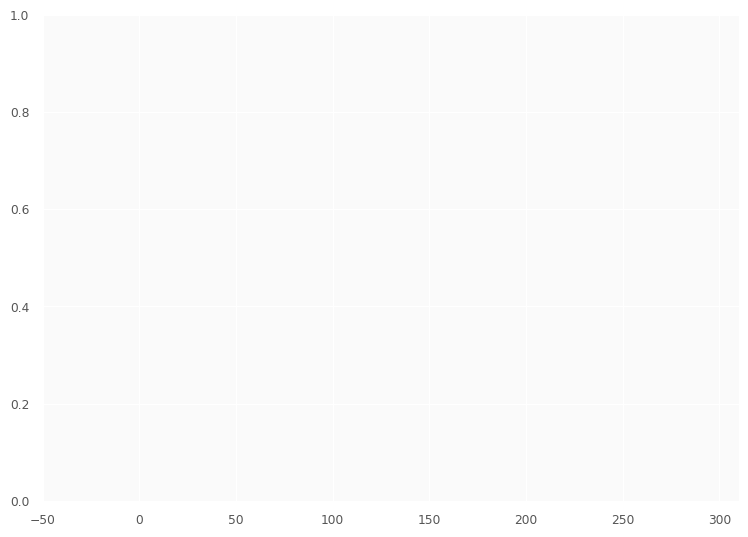

In [189]:
#Boxplot
plt.style.use('ggplot') # Using ggplot2 style visuals
f, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('#fafafa')
ax.set(xlim=(-50, 310))
#plt.title("Overview Data Set")
ax = sns.boxplot(data = data,
  orient = 'h',
  palette = 'Set2')
plt.savefig('1') 	#To save the figure

Old Shape:  (100000, 9)



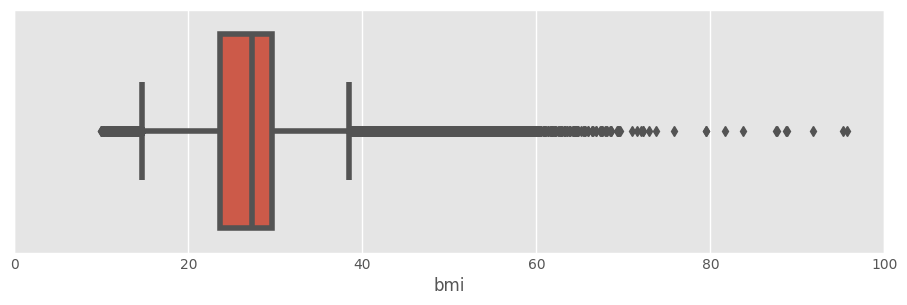

In [92]:
#BoxPlot of Bmi
print("Old Shape: ", data.shape)
print()
plt.figure(figsize=(10, 3))
ax = sns.boxplot(x="bmi", data=data)
ax.set(xlim=(0, 100))
#plt.title("Bmi with Outliers", fontsize=10)
plt.show()


New Shape:  (76900, 9)



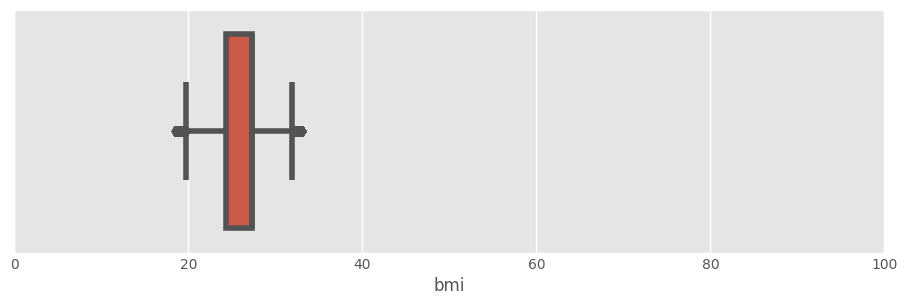

In [103]:
# # Outlier removal of bmi (as we see we have many outliers from visualization, we want to remove it)
# 1. frist calculation IQR
IQR = data['bmi'].quantile(0.75) - data['bmi'].quantile(0.25)

# 2. determine the upper and lower boundries :
upper_boundry = data['bmi'].quantile(0.75) + (IQR*1.5)
lower_boundry = data['bmi'].quantile(0.25) - (IQR*1.5)

# 3. removing outliers :
data = data[data['bmi'] <= upper_boundry]
data = data[data['bmi'] >= lower_boundry]

print()
print("New Shape: ", data.shape)
print()

#Box plot of Bmi
plt.figure(figsize=(10, 3))
ax = sns.boxplot(x="bmi", data=data)
ax.set(xlim=(0, 100))
#plt.title('Bmi without Outliers', fontsize  = 10)
plt.show()


New Shape:  (75617, 9)



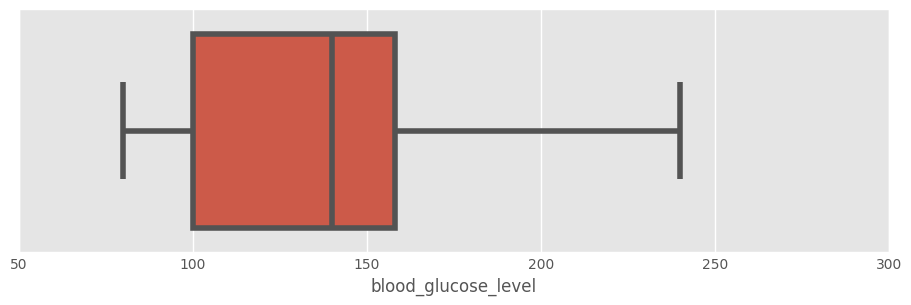

In [106]:
# # Outlier removal of blood_glucose_level
# 1. frist calculation IQR
IQR = data['blood_glucose_level'].quantile(0.75) - data['blood_glucose_level'].quantile(0.25)

# 2. determine the upper and lower boundries :
upper_boundry = data['blood_glucose_level'].quantile(0.75) + (IQR*1.5)
lower_boundry = data['blood_glucose_level'].quantile(0.25) - (IQR*1.5)

# 3. removing outliers :
data = data[data['blood_glucose_level'] <= upper_boundry]
data = data[data['blood_glucose_level'] >= lower_boundry]

print()
print("New Shape: ", data.shape)
print()

#Box plot of Blood_glucose_level
plt.figure(figsize=(10, 3))
ax = sns.boxplot(x="blood_glucose_level", data=data)
ax.set(xlim=(50, 300))
#plt.title("Blood Glucose Level without Outliers", fontsize=10)
plt.show()

In [108]:
data.shape

(75617, 9)

<Axes: xlabel='blood_glucose_level'>

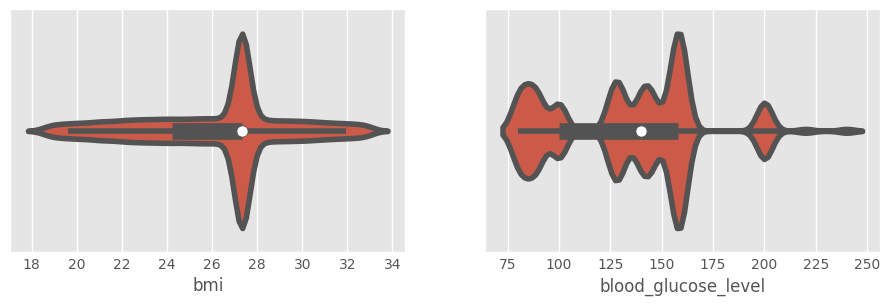

In [109]:
#Boxplot & ViolinPlot of bmi:
plt.figure(figsize = [10,3])

plt.subplot(1,2,1)
sns.violinplot(data = data, x = 'bmi')

plt.subplot(1,2,2);
sns.violinplot(data = data, x = 'blood_glucose_level')

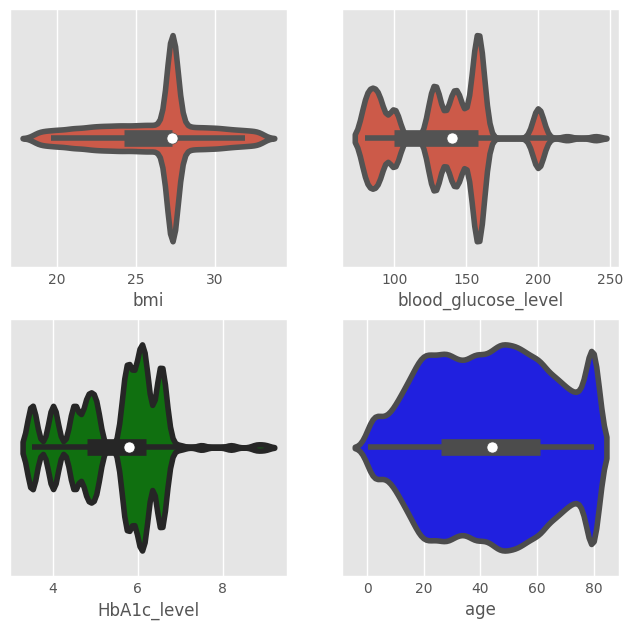

In [110]:
#ViolinPlot of 4 features
plt.figure(figsize = [7,7]);

plt.subplot(2,2,1);
sns.violinplot(data = data, x = 'bmi');

plt.subplot(2,2,2);
sns.violinplot(data = data, x = 'blood_glucose_level');

plt.subplot(2,2,3);
sns.violinplot(data = data, x = 'HbA1c_level',color='green', marker='o');

plt.subplot(2,2,4);
sns.violinplot(data = data, x = 'age',color='blue', marker='o');

# Data Exploration

In [ ]:
display(data.columns) #learning about the columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
# For Data Summarizing, group by 2 Categorical & 2 Numerical variable
data.groupby(['gender', 'smoking_history'])['age', 'bmi'].agg([np.mean, np.median])

age               bmi       
                             mean median       mean median
gender smoking_history                                    
Female current          43.072346   43.0  26.932587  27.32
       non-smoker       40.012535   39.0  25.920142  27.32
       past_smoker      50.543734   51.0  27.274188  27.32
Male   current          44.854357   45.0  27.549653  27.32
       non-smoker       36.082420   35.0  25.827350  27.32
       past_smoker      54.345560   57.0  28.055094  27.32

In [ ]:
# Cross tabulation of 2 Categorical variable with Total
pd.crosstab(data.gender,data.smoking_history,margins=True, margins_name="Total", normalize = False).style.background_gradient(cmap='summer_r')

In [ ]:
# groupby of 'gender' column
by_gen= data.groupby('gender')

# mean of every resting ecg type
by_gen.mean()

age  hypertension  heart_disease        bmi  HbA1c_level  \
gender                                                                   
Female  42.192320      0.063411       0.024114  26.253676     5.471565   
Male    40.780338      0.072702       0.054435  26.466322     5.511864   
Other   30.705882      0.000000       0.000000  28.161176     5.429412   

        blood_glucose_level  diabetes  
gender                                 
Female           134.563109  0.050665  
Male             135.294935  0.069618  
Other            139.411765  0.000000

# Feature Engineering

### Recategorize Smoking_history



In [112]:
# Recategorize
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
data['smoking_history'] = data['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(data['smoking_history'].value_counts())

non-smoker     53189
past_smoker    15108
current         7320
Name: smoking_history, dtype: int64


### bmi & diabetes

* Body mass index is a measure of body fat based on height and weight that applies to adult men and women.
* it is the weight in kilograms divided by height in meters squared


In [ ]:
#bmi counts with %
counts = data.bmi.value_counts()
percs = data.bmi.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

count  percentage
27.32  25495    0.274394
23.00    103    0.001109
27.12    101    0.001087
27.80    100    0.001076
24.96    100    0.001076
...      ...         ...
37.53      2    0.000022
37.72      2    0.000022
38.29      2    0.000022
37.89      1    0.000011
38.34      1    0.000011

[2380 rows x 2 columns]

If BMI	=< 18.5	weight_type is Underweight

If BMI 18.5 – 24.9	weight_type is Normal

If BMI 25 – 29.9	weight_type is Overweight

If BMI >= 30	weight_type is Obesity

Reference: https://www.cdc.gov/diabetes/basics/getting-tested.html

**New Feature 'weight_type'**

In [113]:
#New Categorical feature 'weight_type' a.c.to bmi values
weight_type = []
for value in data['bmi']:
    if value <= 18.5:
        weight_type.append('underweight')
    elif (18.5 < value) and (value <= 24.9):
        weight_type.append('normal')
    elif (24.9 < value) and (value <= 29.9):
        weight_type.append('overweight')
    elif (value > 29.9):
        weight_type.append('obesity')
data['weight_type'] = weight_type

### HbA1c_level & diabetes

* A hemoglobin A1C (HbA1C) test is a blood test that shows what your average blood sugar (glucose) level was over the past two to three months.

* we will create a new feature bassed on the value of (HbA1C)

In [ ]:
# Hemoglobin level counts with %
counts = data.HbA1c_level.value_counts()
percs = data.HbA1c_level.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

count  percentage
6.6   7935    0.085402
5.7   7831    0.084282
6.5   7805    0.084002
5.8   7752    0.083432
6.2   7722    0.083109
6.0   7695    0.082819
6.1   7471    0.080408
3.5   7184    0.077319
4.8   7117    0.076598
4.5   7097    0.076382
4.0   7087    0.076275
5.0   7006    0.075403
8.8    559    0.006016
9.0    551    0.005930
8.2    547    0.005887
7.5    525    0.005650
6.8    522    0.005618
7.0    508    0.005467

**New Feature initial_diagnosis'**

If HbA1c level	< 5.7 initial diagnosis Normal

If HbA1c level	5.7 - 6.4 initial diagnosis Prediabetes

If HbA1c level	>= 6.5 initial diagnosis Diabetes

Reference: https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html

In [114]:
#Creating new Categorical feature (initial_diagnosis) based on Numerical feature (HbA1c level)
initial_diagnosis = []
for value in data['HbA1c_level']:
    if value < 5.7:
        initial_diagnosis.append('normal')
    elif (5.7 <= value) and (value <= 6.4):
        initial_diagnosis.append('prediabetes')
    elif (value >= 6.5):
        initial_diagnosis.append('diabetes')

data['initial_diagnosis'] = initial_diagnosis

### blood_glucose_level & diabetes


* If blood_glucose_level	 =< 99	sugar_test is normal
* If blood_glucose_level	 100 – 125	sugar_test is Prediabetes
*If blood_glucose_level	 >= 126	sugar_test is Diabetes

Resources :

https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test
https://www.cdc.gov/diabetes/basics/getting-tested.html

In [ ]:
# blood_glucose_level counts with %
counts = data.blood_glucose_level.value_counts()
percs = data.blood_glucose_level.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

count  percentage
130   7794    0.077954
159   7756    0.077574
140   7730    0.077314
160   7708    0.077094
126   7700    0.077014
145   7679    0.076804
200   7599    0.076004
155   7575    0.075764
90    7110    0.071113
80    7105    0.071063
100   7025    0.070263
158   7024    0.070253
85    6900    0.069012
280    729    0.007291
300    674    0.006741
240    636    0.006361
260    635    0.006351
220    603    0.006031

In [115]:
#New Categorical feature 'sugar_test' a.c.to blood_glucose_level values
sugar_test = []

for value in data['blood_glucose_level']:
    if value <= 99:
        sugar_test.append('normal')

    elif (99 < value) and (value <= 125):
        sugar_test.append('prediabetes')

    elif (value > 125):
        sugar_test.append('diabetes')

data['sugar_test'] = sugar_test

In [116]:
data['sugar_test'].value_counts()

diabetes       53618
normal         16475
prediabetes     5524
Name: sugar_test, dtype: int64

In [117]:
#Crosstab of sugar_test and diabetes
pd.crosstab(data.sugar_test,data.diabetes,margins=True, margins_name="Total", normalize = False).style.background_gradient(cmap='summer_r')

# Exploratory Data Analysis

## Univariate analysis

In [216]:
# Categorical & Numerical features
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'smoking_history', 'weight_type', 'initial_diagnosis',
       'sugar_test'],
      dtype='object')
Numerical Variables:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


1. Gender

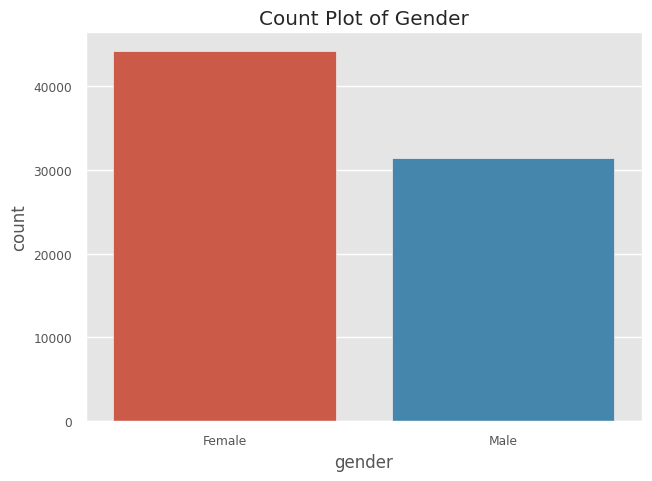

In [195]:
# Gender
ax = sns.countplot(data=data, x='gender')
ax.set(title='Count Plot of Gender')
sns.set(font_scale=0.8)	#To fix the font size of the figure title
sns.set_style("white")	#To fix the background color
sns.set_palette("PuBuGn_d")	#To fix the figure color

2. Smoking history

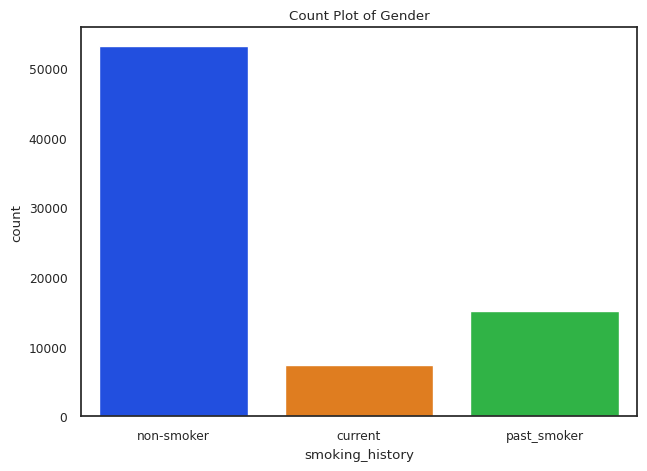

In [224]:
# Smoking_history
ax = sns.countplot(data=data, x='smoking_history')
ax.set(title='Count Plot of Gender')
sns.set(font_scale=0.8)	#To fix the font size of the figure title
sns.set_style("white")	#To fix the background color
sns.set_palette("bright")	#To fix the figure color

3. Weight type

[Text(0.5, 1.0, 'Count Plot of Smoking History')]

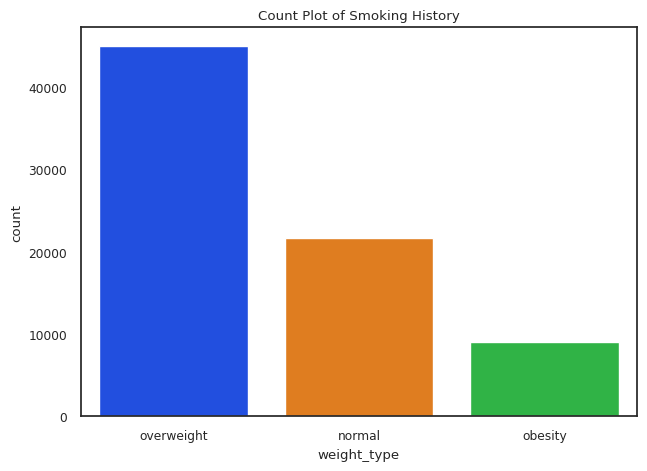

In [225]:
ax = sns.countplot(data=data, x='weight_type')
ax.set(title='Count Plot of Smoking History')

4. Initial diagnoses

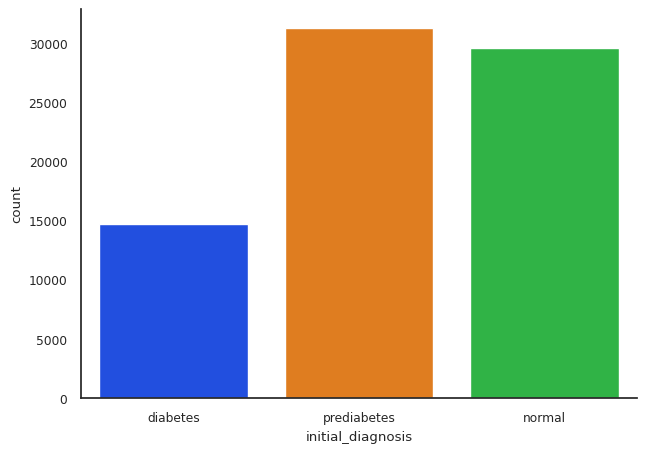

In [227]:
sns.countplot(data=data, x='initial_diagnosis')
#plt(title='Count Plot of Smoking History')
sns.despine()

5. Sugar test

[Text(0.5, 1.0, 'Count Plot of Smoking History')]

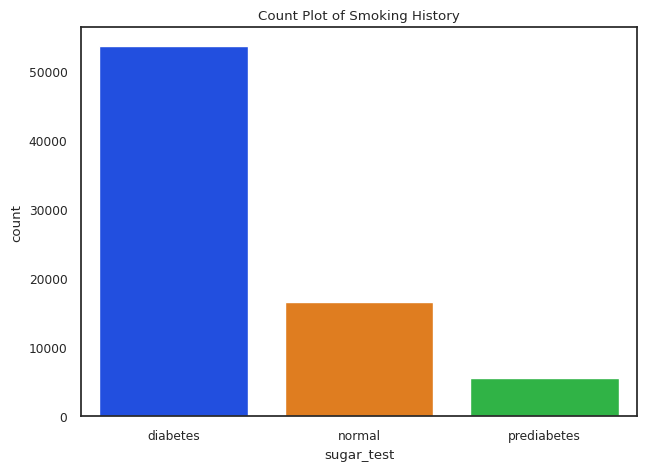

In [228]:
ax = sns.countplot(data=data, x='sugar_test')
ax.set(title='Count Plot of Smoking History')

### Pie Plot

In [229]:
# Gender visualization
num_var = list(data['gender'].value_counts().values)
labels = list(data['gender'].value_counts().index)
count_dict = dict(enumerate(num_var))
print(num_var)
print(labels)

[44196, 31421]
['Female', 'Male']


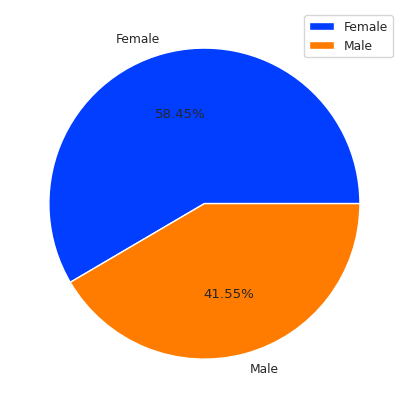

In [230]:
plt.pie(count_dict.values(), labels = ['Female', 'Male'],autopct='%1.2f%%');
plt.legend();
#plt.title('Percentage of records w.r.t gender feature',fontsize=10);

In [231]:
# Number of patients with diabetes
num_var = list(data['diabetes'].value_counts().values)
labels = list(data['diabetes'].value_counts().index)
count_dict = dict(enumerate(num_var))
print(num_var)
print(labels)

[71481, 4136]
[0, 1]


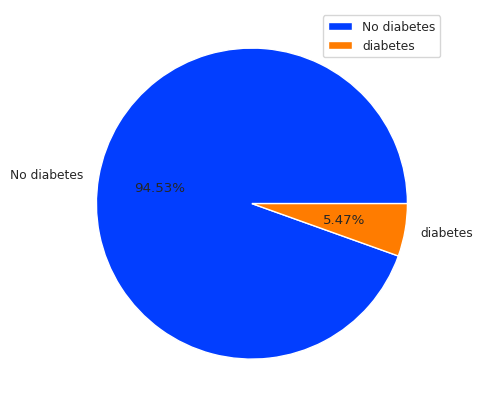

<Figure size 640x480 with 0 Axes>

In [232]:
plt.pie(num_var, labels = ['No diabetes','diabetes'],autopct='%1.2f%%');
plt.legend();
#plt.title('Percentage of patients with diabetes', fontsize=10);

sns.set(font_scale=0.8)	#To fix the font size of the figure title
#plt.title('Correlation with Diabetes')	#To write the figure title
plt.savefig('5') 	#To save the figure
plt.show()

sns.set_style("white")
sns.set_palette("summer_r")
sns.despine()

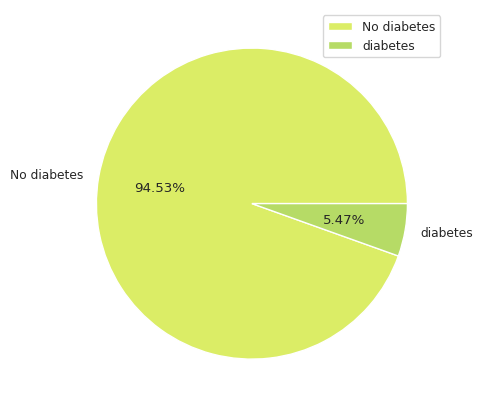

<Figure size 640x480 with 0 Axes>

In [233]:
plt.pie(num_var, labels = ['No diabetes','diabetes'],autopct='%1.2f%%');
plt.legend();
#plt.title('Percentage of patients with diabetes', fontsize=10);

sns.set(font_scale=0.8)	#To fix the font size of the figure title
#plt.title('Correlation with Diabetes')	#To write the figure title
plt.savefig('5') 	#To save the figure
plt.show()

sns.set_style("white")
sns.set_palette("summer_r")
sns.despine()

## Bivariate analysis

* catplot
* scatter
* heatmap
* boxplot
* violinplot

In [173]:
# Categorical & Numerical features
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'smoking_history', 'weight_type', 'initial_diagnosis',
       'sugar_test'],
      dtype='object')
Numerical Variables:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


1. Diabetes vs Gender

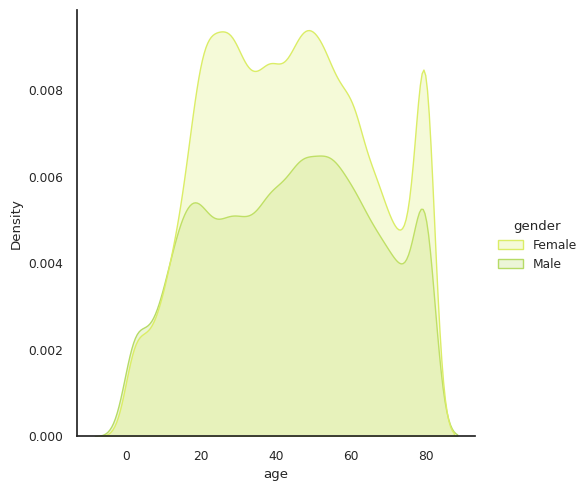

In [183]:
sns.displot(kind='kde', data=data, x='age', hue='gender', fill=True)

2. Diabetes vs Blood glucose level

[Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')]

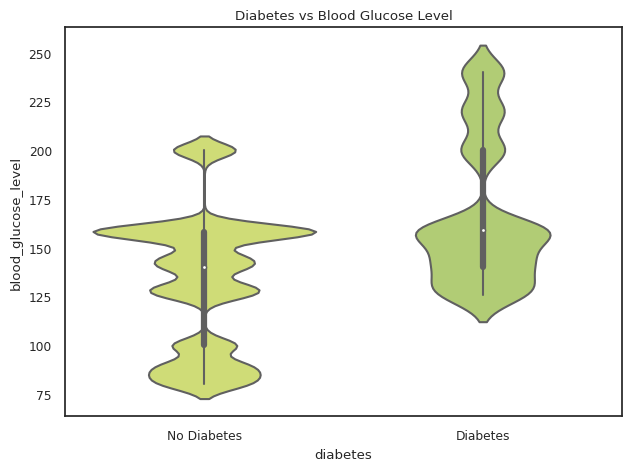

In [206]:
ax = sns.violinplot(data=data, x='diabetes', y='blood_glucose_level')
ax.set(title='Diabetes vs Blood Glucose Level')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

Conclusion

* with increase in blood glucose level, the chance of diabetes increases
* the people with diabetes have a blood glucose level of around 160 on average

3. Gender vs Blood glucose level

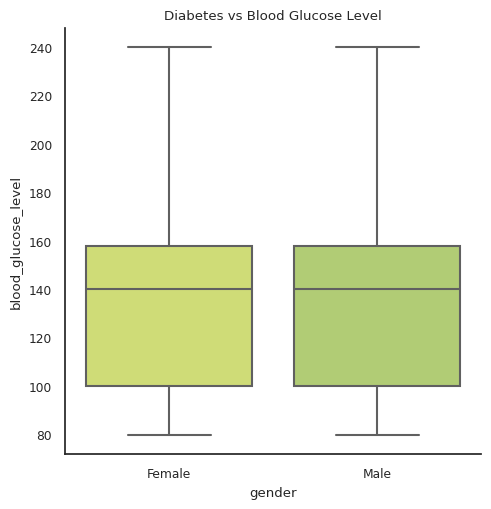

In [210]:
ax = sns.catplot(data=data, x='gender', y='blood_glucose_level', kind='box')
ax.set(title='Diabetes vs Blood Glucose Level')
#ax.set_xticklabels(['No Diabetes', 'Diabetes'])

4. Diabetes vs Bmi

5. Diabetes vs Bmi

### Scatter plot

TypeError: ignored

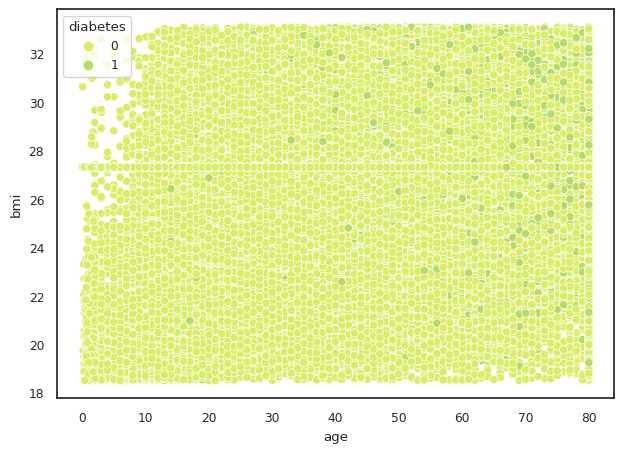

In [211]:
# Scatterplot Age vs BMI colored by Diabetes classification
ax= sns.scatterplot(x='age', y='bmi', hue='diabetes', data=data)
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
plt.title('Age vs Bmi')
plt.show()

### Density Plot

Numerical features vs gender

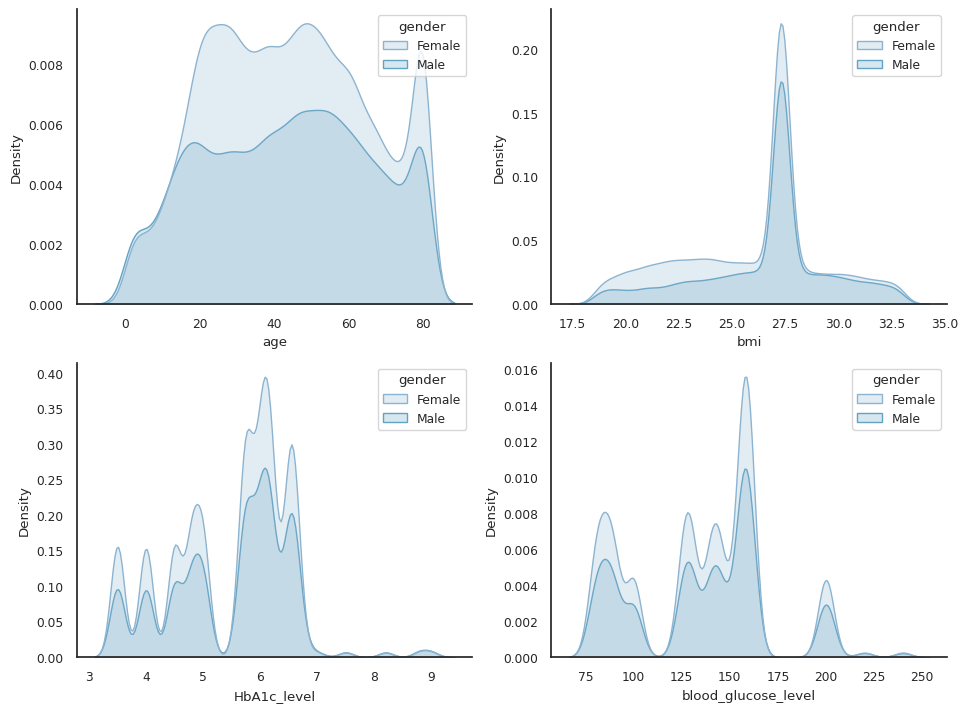

In [212]:
# kernel density estimation (KDE) plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the density plot and histogram for each feature
sns.kdeplot(ax=axs[0, 0], data=data, x="age", fill=True, hue='gender')
sns.kdeplot(ax=axs[0, 1], data=data, x="bmi", fill=True, hue='gender')
sns.kdeplot(ax=axs[1, 0], data=data, x="HbA1c_level", fill=True, hue='gender')
sns.kdeplot(ax=axs[1, 1], data=data, x="blood_glucose_level", fill=True, hue='gender')
sns.set_style("white")

sns.set_palette("bright")
sns.despine() #To remove plot boundaries
# Add titles to the subplots
#axs[0, 0].set_title("Age")
#axs[0, 1].set_title("Bmi")
#axs[1, 0].set_title("HbA1c level")
#axs[1, 1].set_title("blood_glucose_level")

# Display the plots
plt.show()

Numerical features vs diabetes

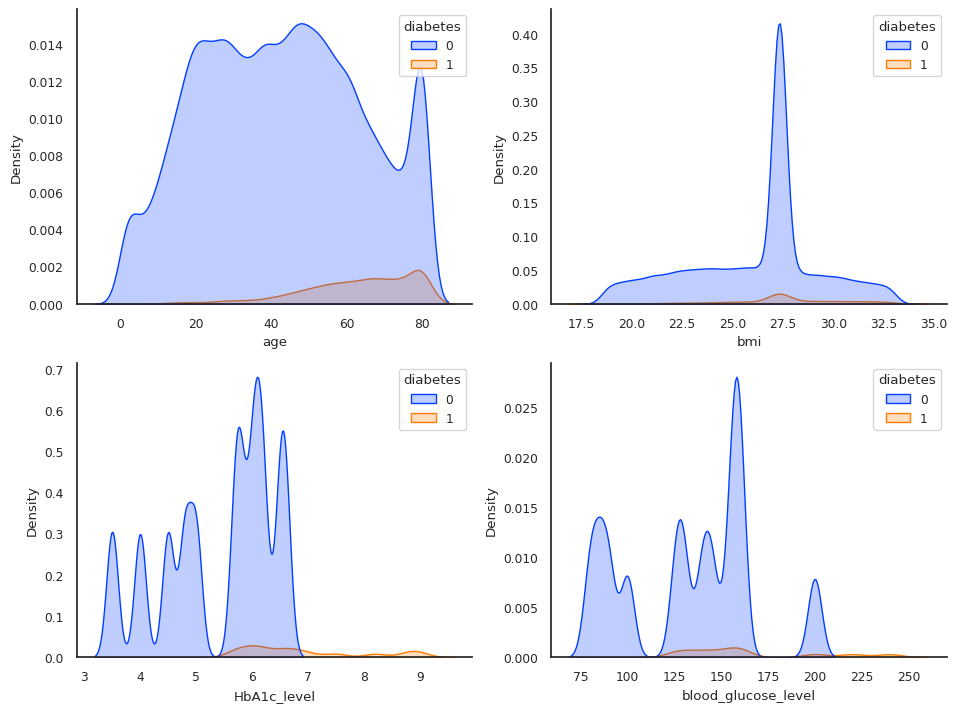

In [213]:
# kernel density estimation (KDE) plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the density plot and histogram for each feature
sns.kdeplot(ax=axs[0, 0], data=data, x="age", fill=True, hue='diabetes')
sns.kdeplot(ax=axs[0, 1], data=data, x="bmi", fill=True, hue='diabetes')
sns.kdeplot(ax=axs[1, 0], data=data, x="HbA1c_level", fill=True, hue='diabetes')
sns.kdeplot(ax=axs[1, 1], data=data, x="blood_glucose_level", fill=True, hue='diabetes')
sns.set_style("white")

sns.set_palette("bright")
sns.despine() #To remove plot boundaries
# Add titles to the subplots
#axs[0, 0].set_title("Age")
#axs[0, 1].set_title("Bmi")
#axs[1, 0].set_title("HbA1c level")
#axs[1, 1].set_title("blood_glucose_level")

# Display the plots
plt.show()

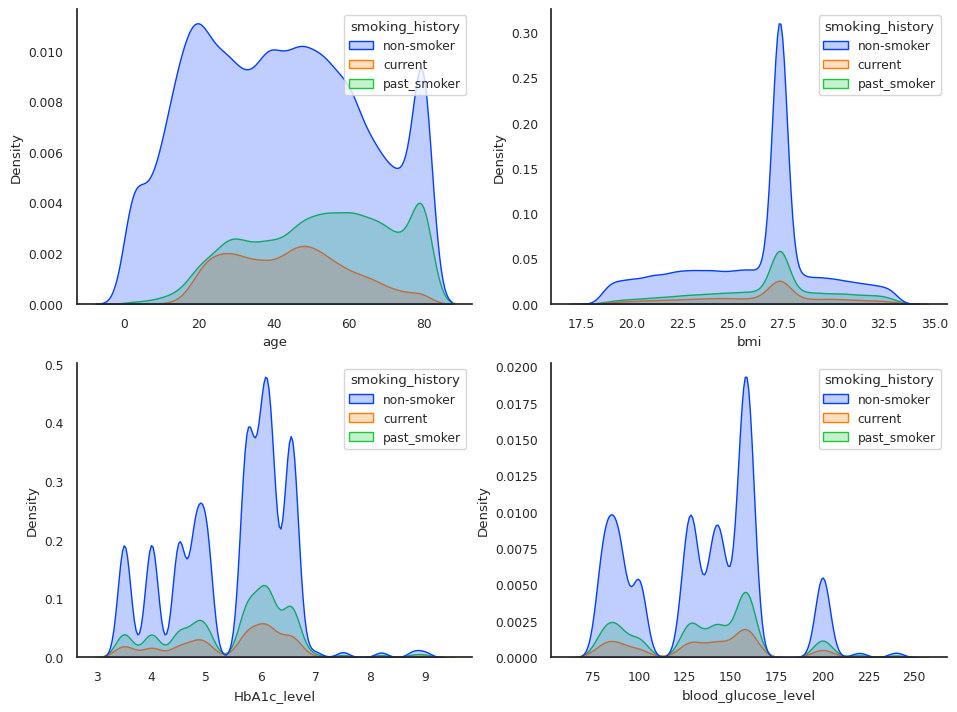

In [215]:
# kernel density estimation (KDE) plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the density plot and histogram for each feature
sns.kdeplot(ax=axs[0, 0], data=data, x="age", fill=True, hue='smoking_history')
sns.kdeplot(ax=axs[0, 1], data=data, x="bmi", fill=True, hue='smoking_history')
sns.kdeplot(ax=axs[1, 0], data=data, x="HbA1c_level", fill=True, hue='smoking_history')
sns.kdeplot(ax=axs[1, 1], data=data, x="blood_glucose_level", fill=True, hue='smoking_history')
sns.set_style("white")

sns.set_palette("bright")
sns.despine() #To remove plot boundaries
# Add titles to the subplots
#axs[0, 0].set_title("Age")
#axs[0, 1].set_title("Bmi")
#axs[1, 0].set_title("HbA1c level")
#axs[1, 1].set_title("blood_glucose_level")

# Display the plots
plt.show()

In [80]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


Categorical Variables:
Index(['gender', 'smoking_history'], dtype='object')
Numerical Variables:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


### Heatmap

<Axes: xlabel='diabetes', ylabel='smoking_history'>

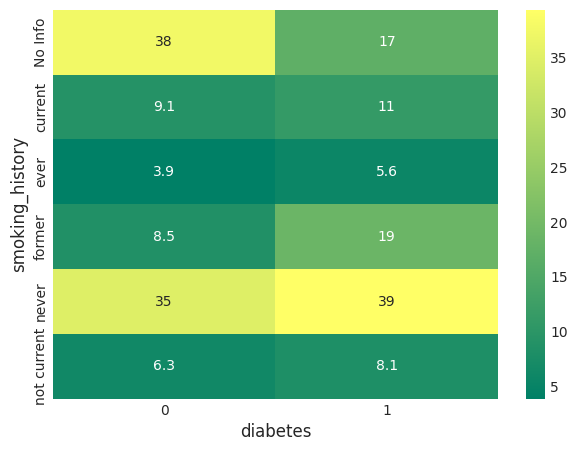

In [82]:
# Smoking history and Gender column
temp_df = pd.crosstab(data['smoking_history'], data['diabetes'], normalize='columns')*100
sns.heatmap(temp_df, annot=True, cmap='summer')

<Axes: xlabel='diabetes', ylabel='gender'>

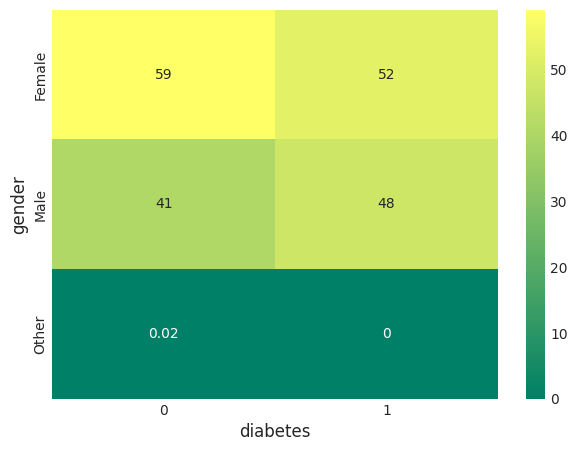

In [79]:
# Diabetes and Gender column
temp_df = pd.crosstab(data['gender'], data['diabetes'], normalize='columns')*100
sns.heatmap(temp_df, annot=True, cmap='summer')

In [ ]:
# Distribution Plots by gender
sns.displot(data = data, x='age',hue='gender',col="gender",aspect=1,kde=True)
sns.displot(data = data, x='bmi',hue='gender',col="gender",aspect=1,kde=True)
sns.displot(data = data, x='HbA1c_level',hue='gender',col="gender",aspect=1,kde=True)
sns.displot(data = data, x='blood_glucose_level',hue='gender',col="gender",aspect=1,kde=True)
sns.set_style("white")

sns.set_palette("bright")
sns.despine()

## Multivariate analysis

### Jointplot

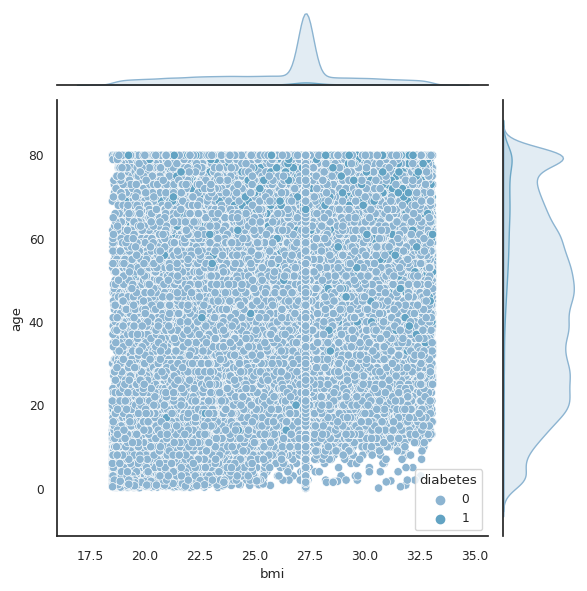

In [186]:
sns.jointplot(data=data, x='bmi', y='age', hue='diabetes', kind='scatter')

In [174]:
# Categorical & Numerical features
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'smoking_history', 'weight_type', 'initial_diagnosis',
       'sugar_test'],
      dtype='object')
Numerical Variables:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


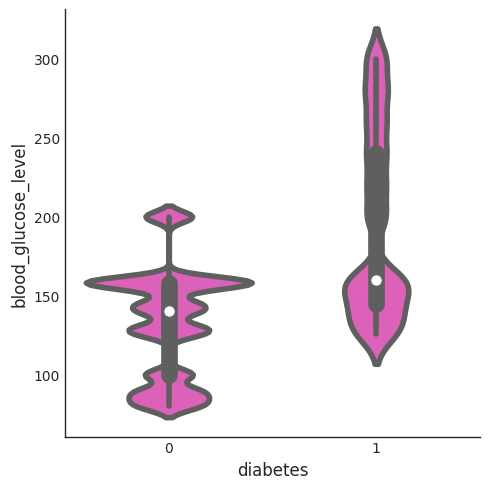

In [76]:
sns.catplot(x='diabetes',
            y='blood_glucose_level',
            data=data,
            kind='violin',
            color = sns.color_palette()[6]);

sns.set_style("white")
sns.set_palette("bright")
sns.despine()

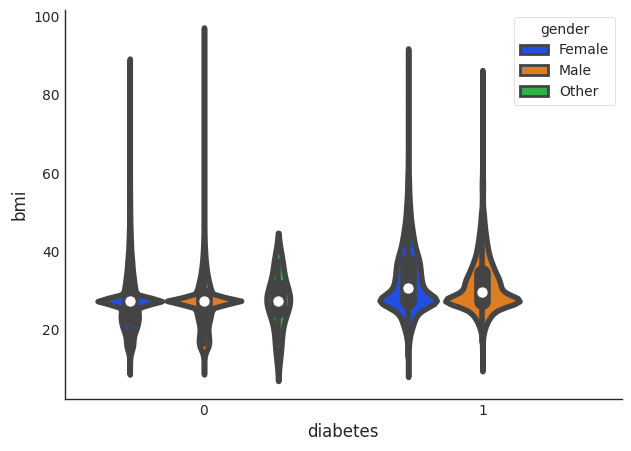

In [17]:
#Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes',
            y='bmi',
            data=data,
            hue='gender');

#sns.set_style("white")
#sns.set_palette("bright")
sns.despine()


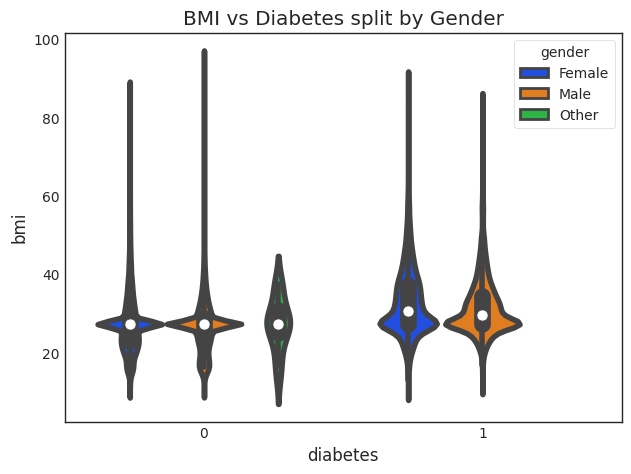

In [19]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', data=data)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

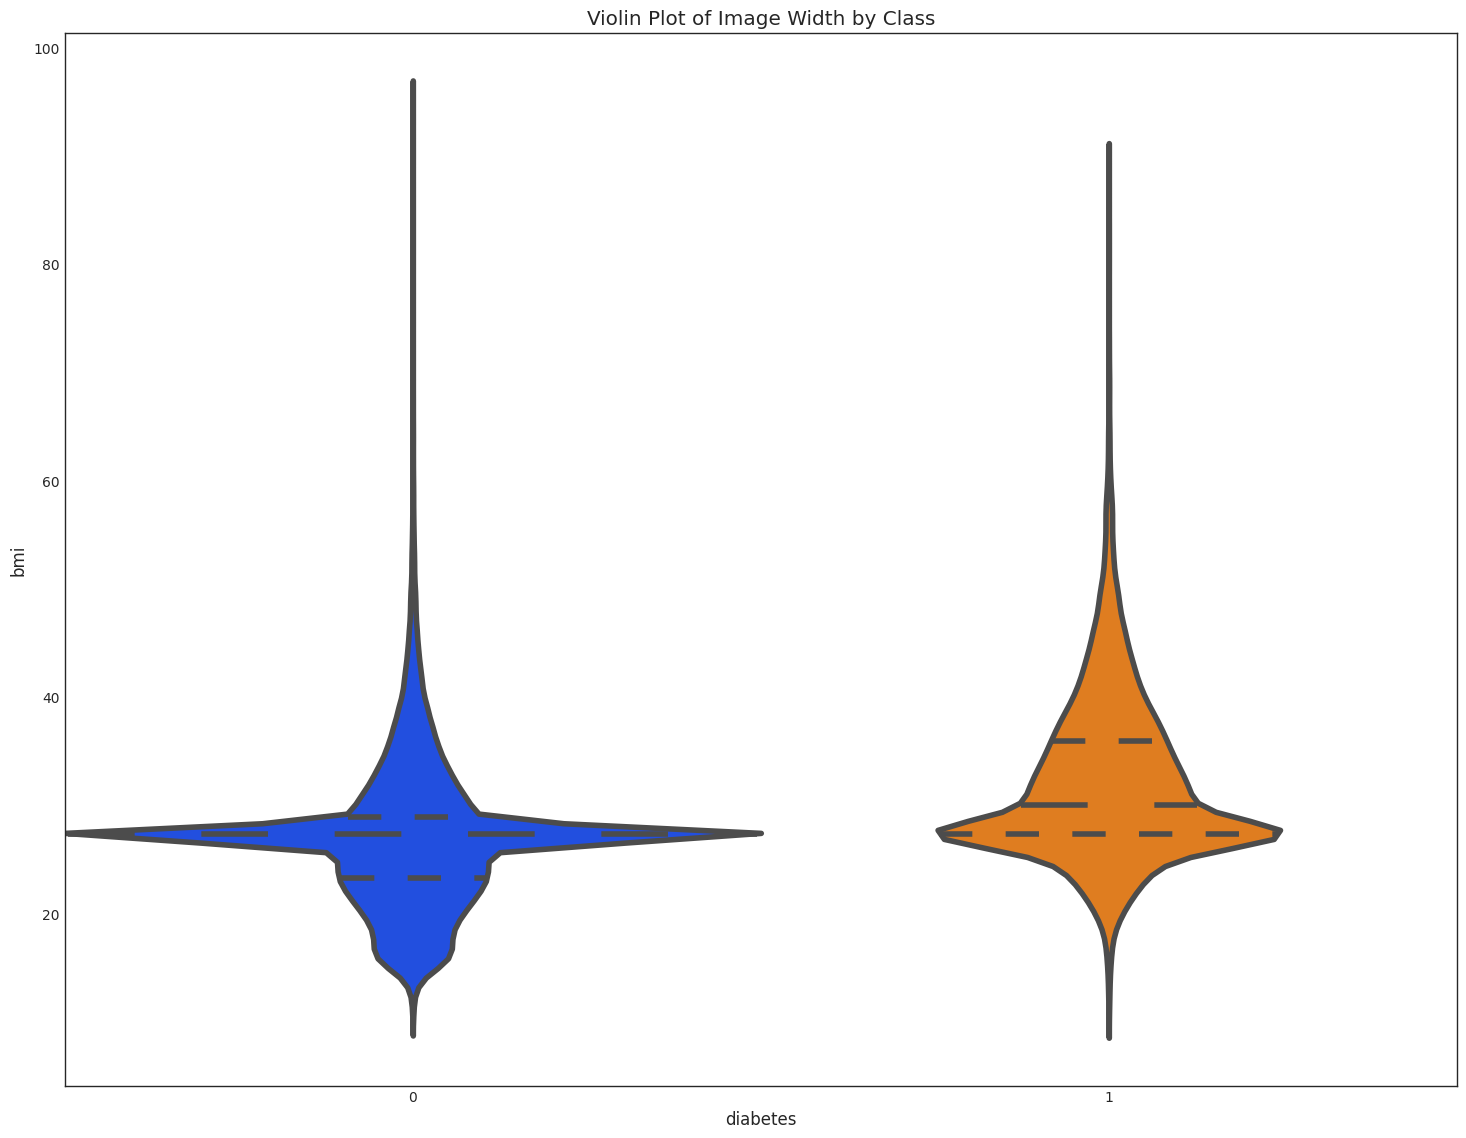

In [35]:
plt.figure(figsize=(16, 13))
sns.violinplot(x="diabetes", y="bmi", data=data,inner="quartile", width=1)
plt.title("Violin Plot of Image Width by Class")
plt.show()


### Heatmap

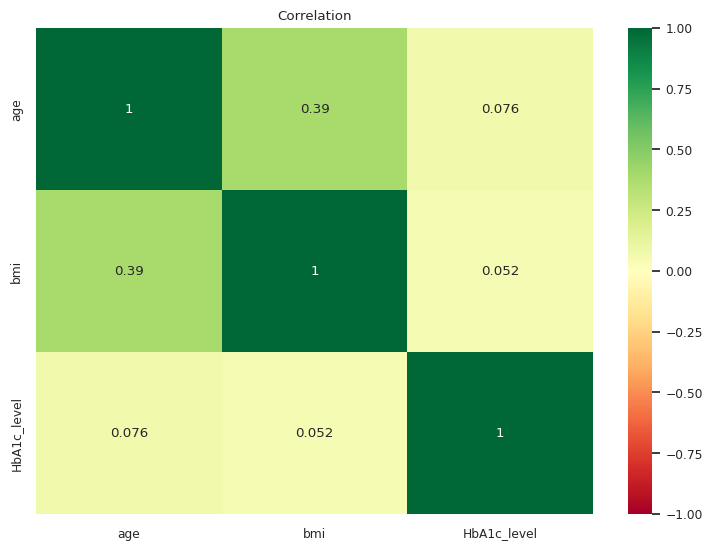

In [ ]:
#To check correlation within numerical features
plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes('float64').corr(),annot=True,cmap="RdYlGn",vmin = -1, vmax = 1)
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("bright")
plt.title('Correlation')
plt.show()

<Axes: >

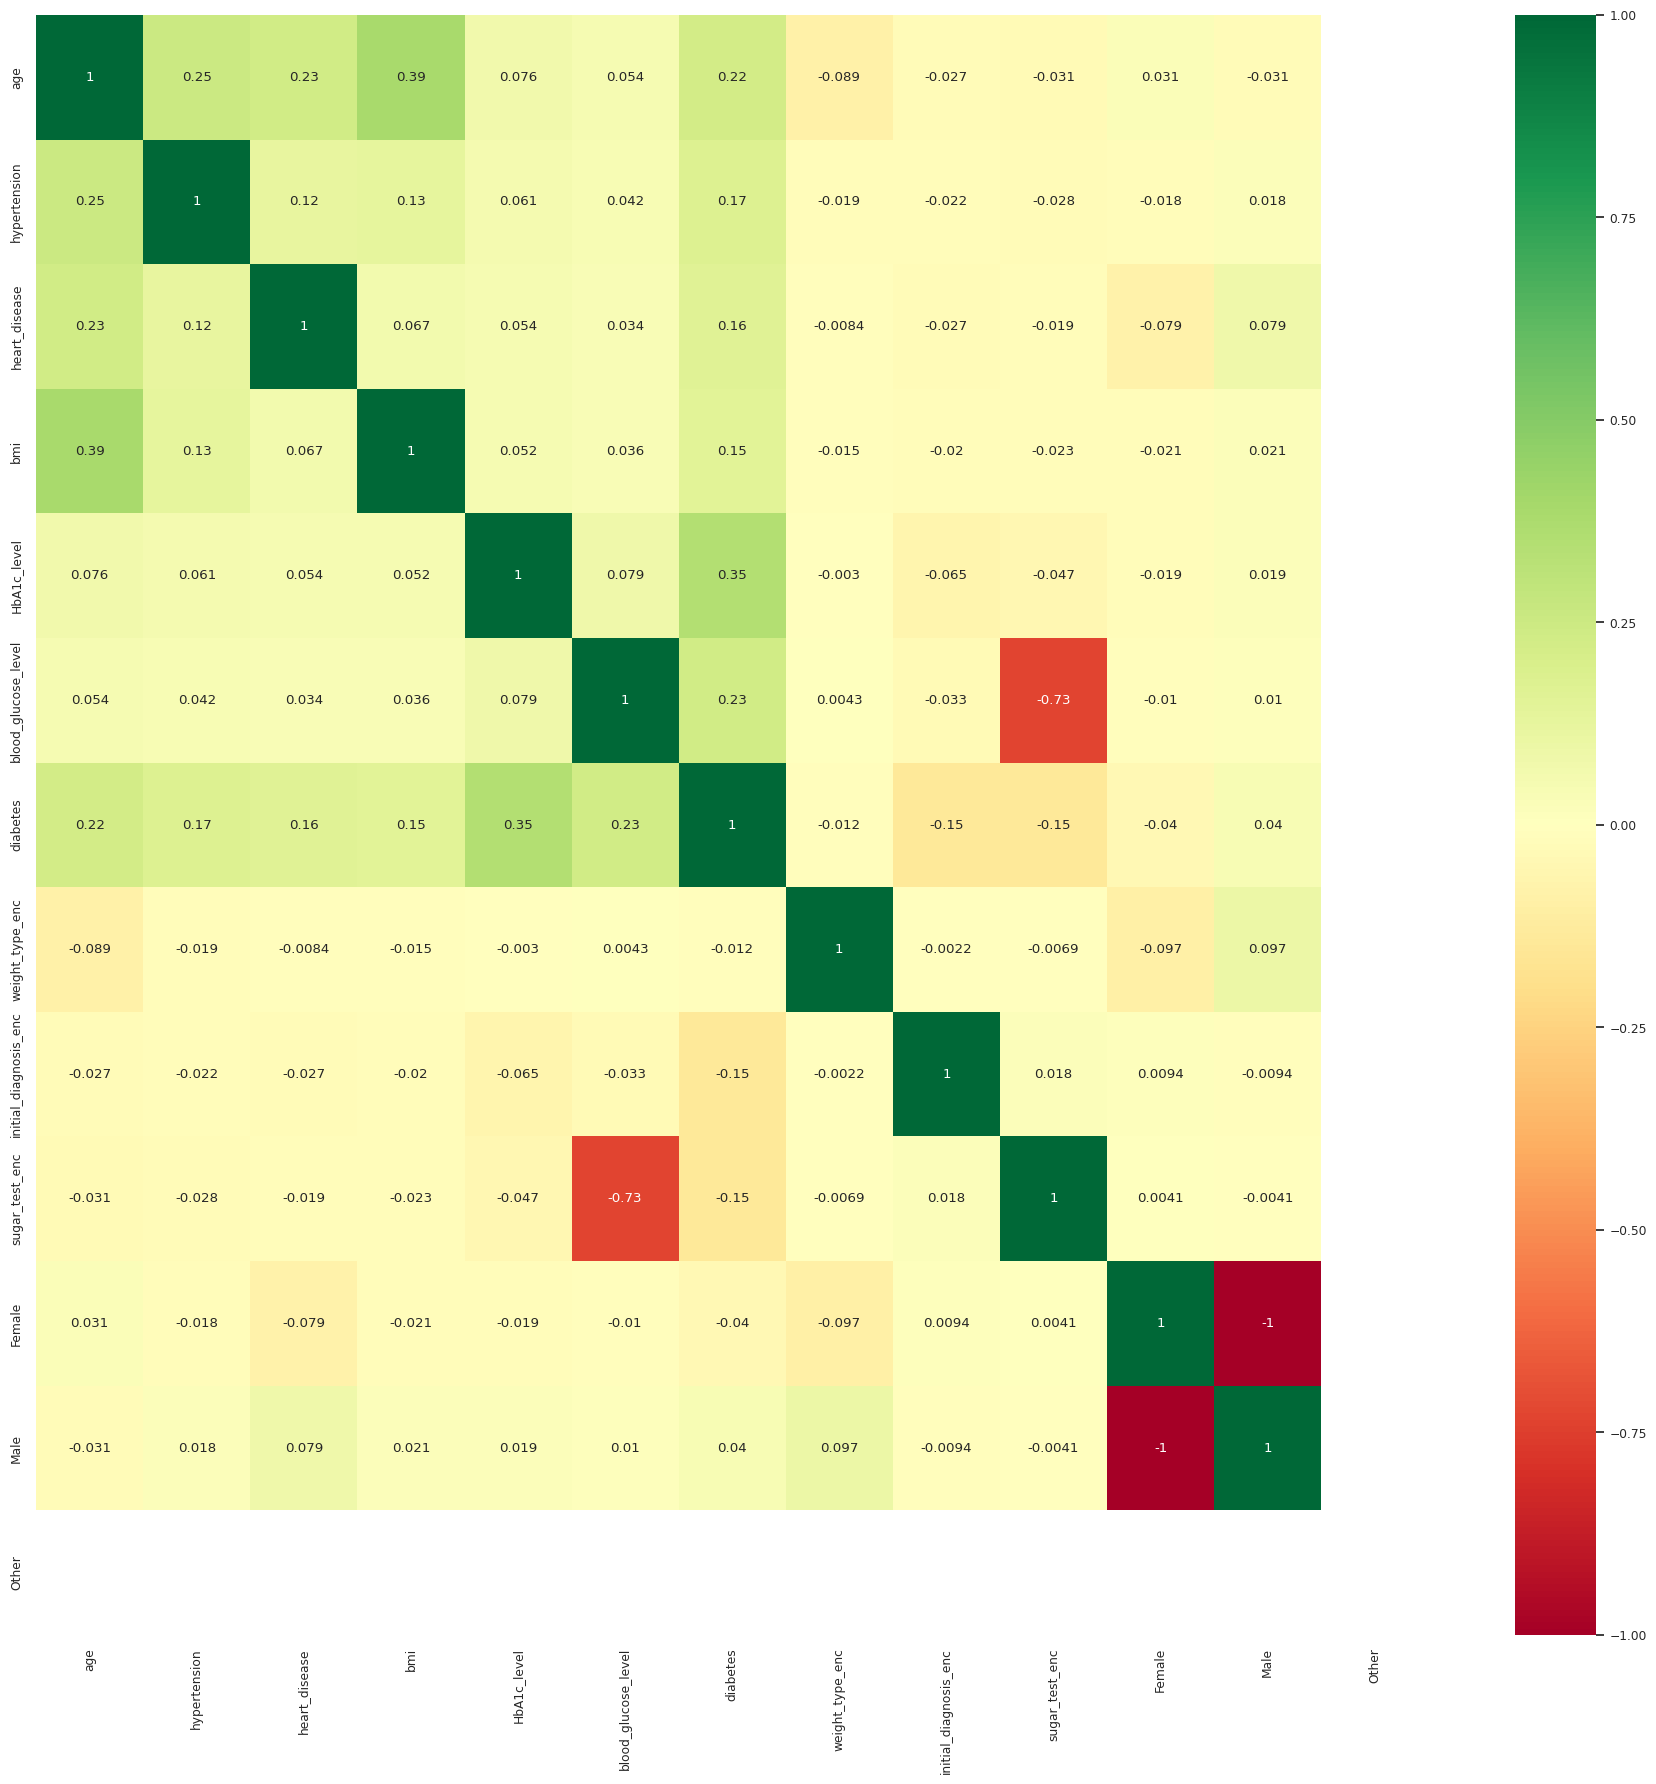

In [ ]:
## Correlation within all features
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

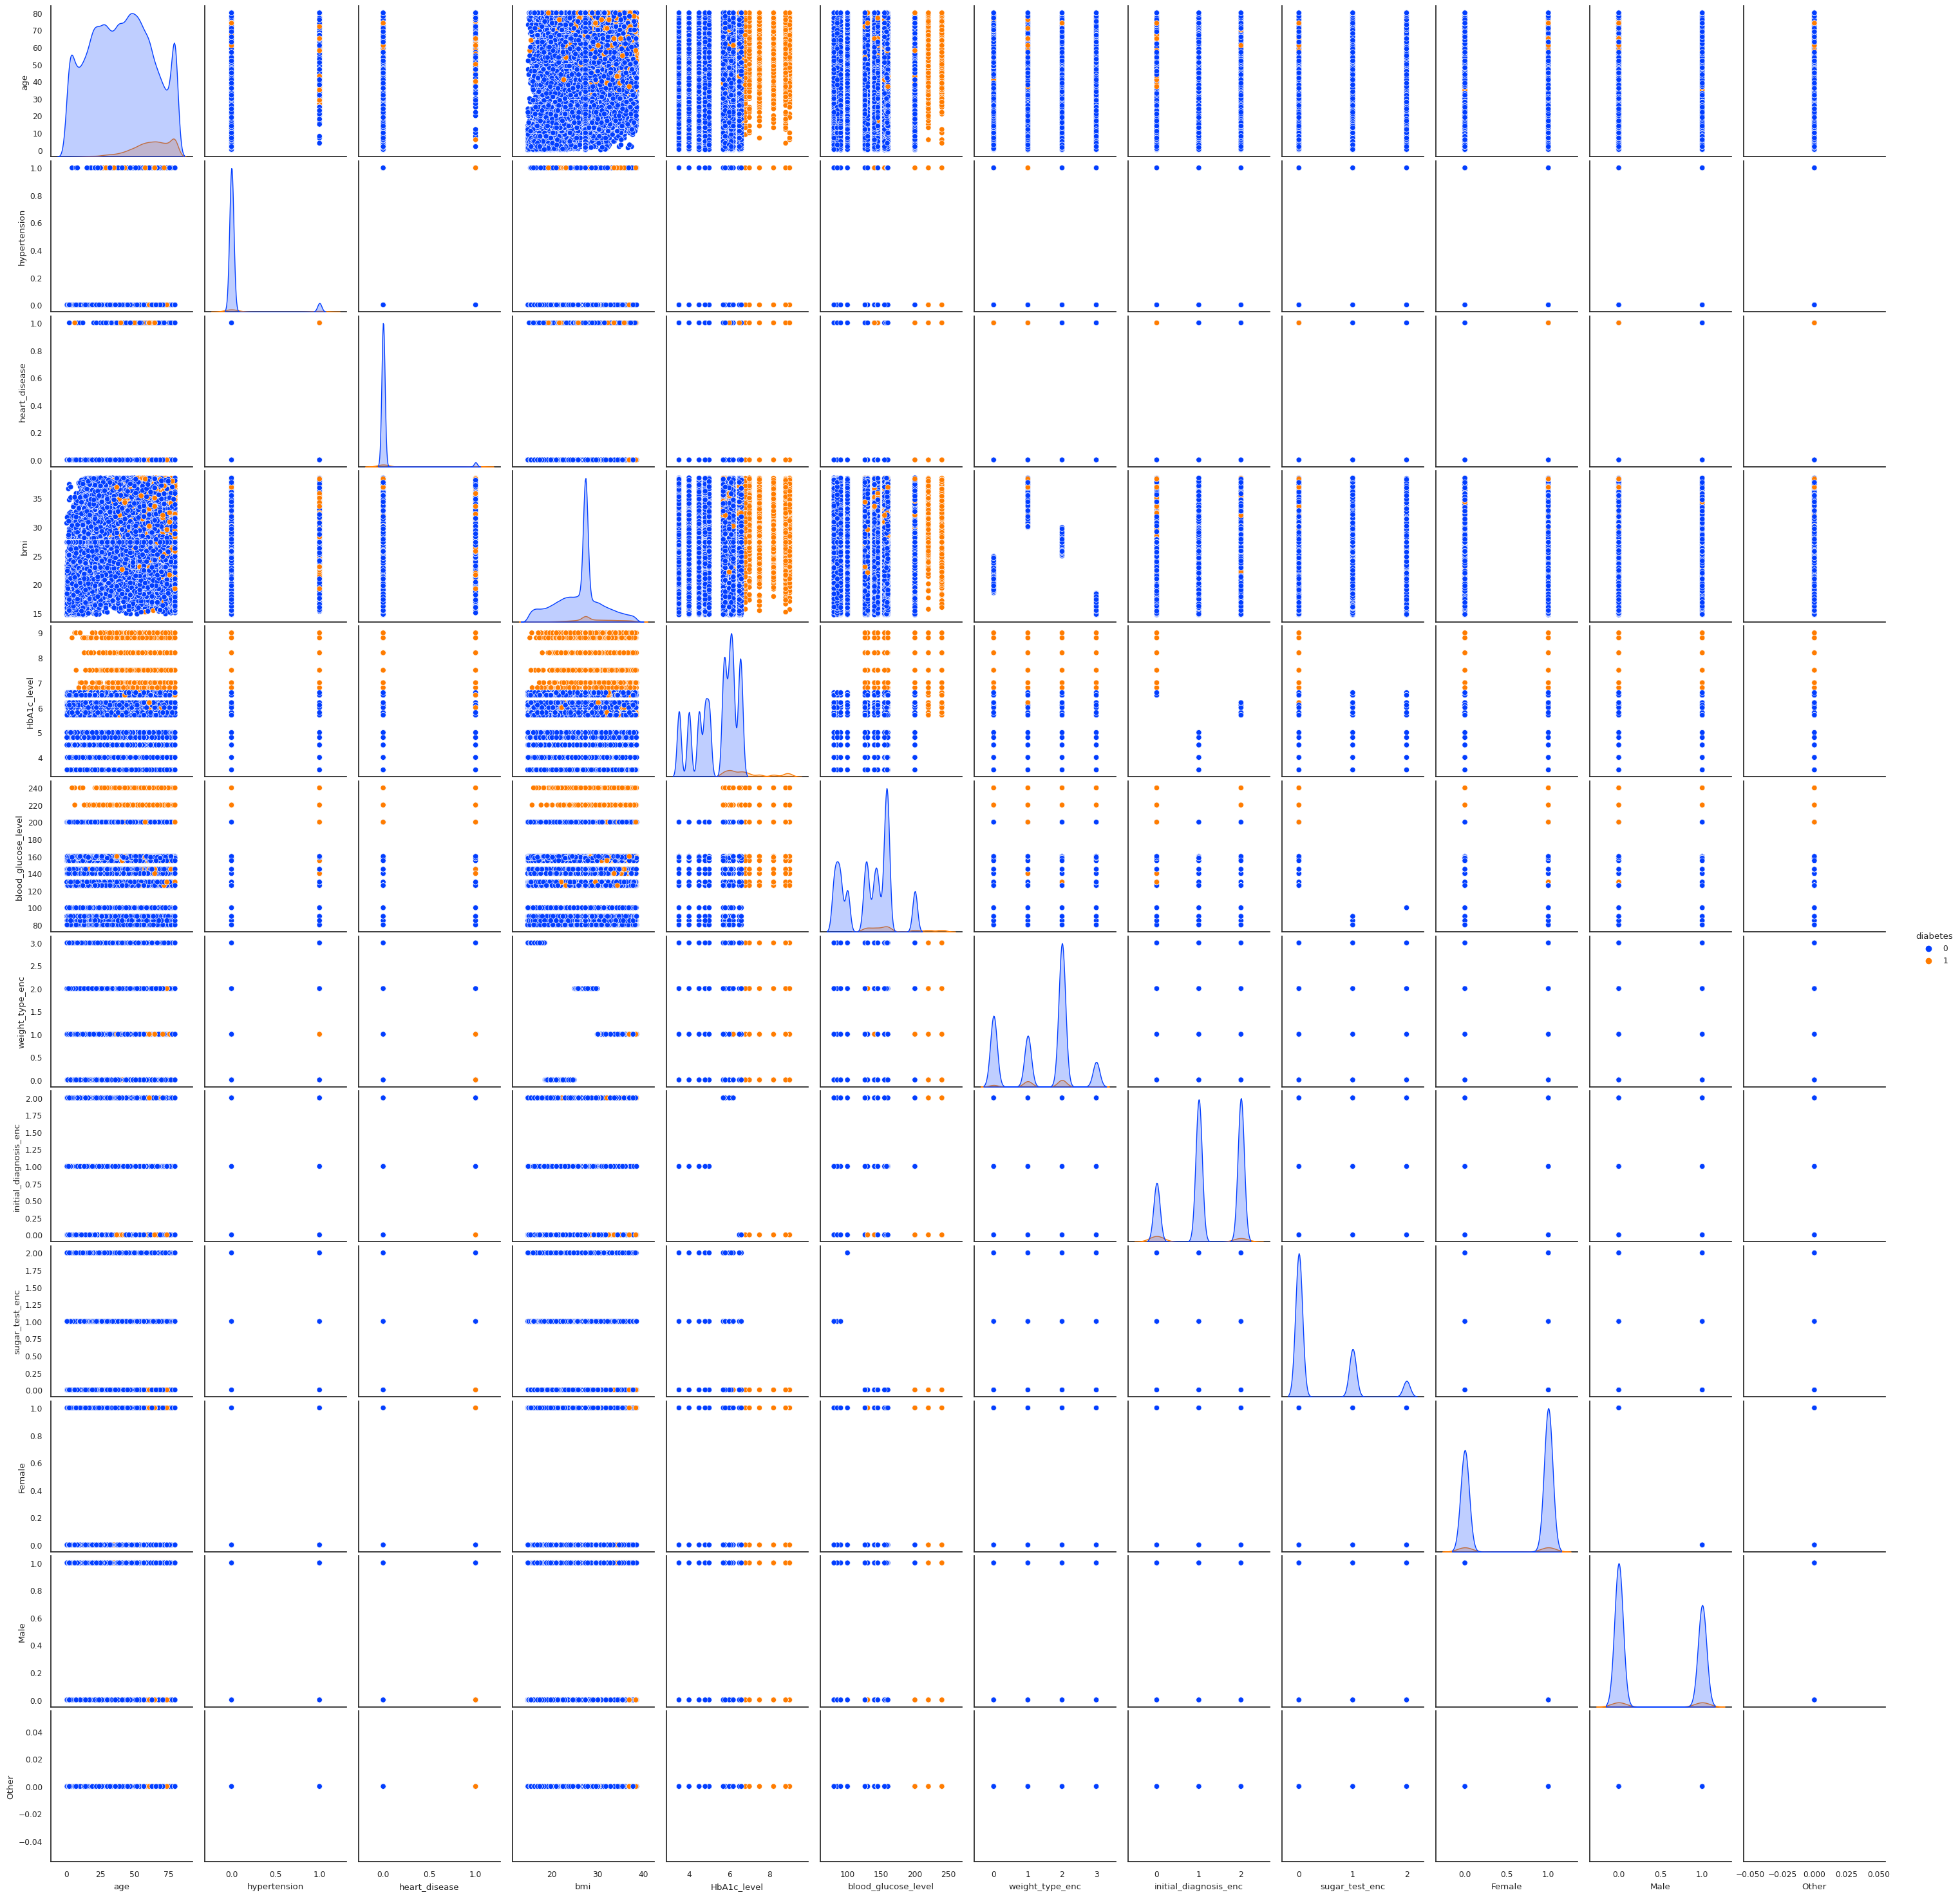

In [ ]:
# Pairplot
sns.pairplot(data, hue='diabetes')

In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'weight_type',
       'initial_diagnosis', 'sugar_test'],
      dtype='object')

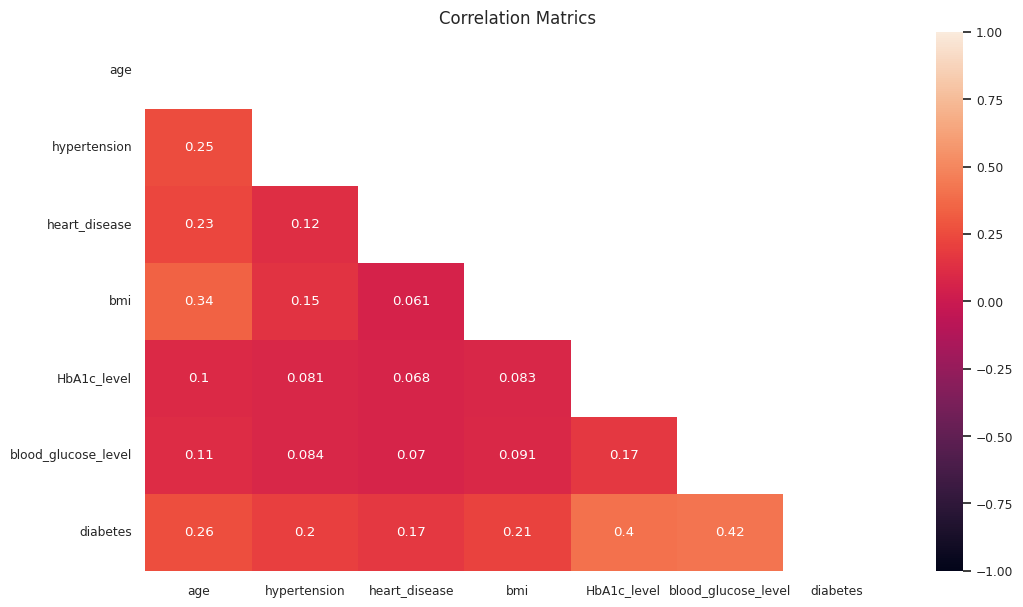

In [ ]:
#To check correlation within all columns excluded one column
plt.figure(figsize=(12,7))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.drop(['initial_diagnosis'],axis=1).corr(), annot = True, vmin = -1, vmax = 1,mask=mask)

sns.set(font_scale=1)
sns.set_style("white")
sns.set_palette("bright")
plt.title('Correlation Matrics')
plt.show()

<Axes: >

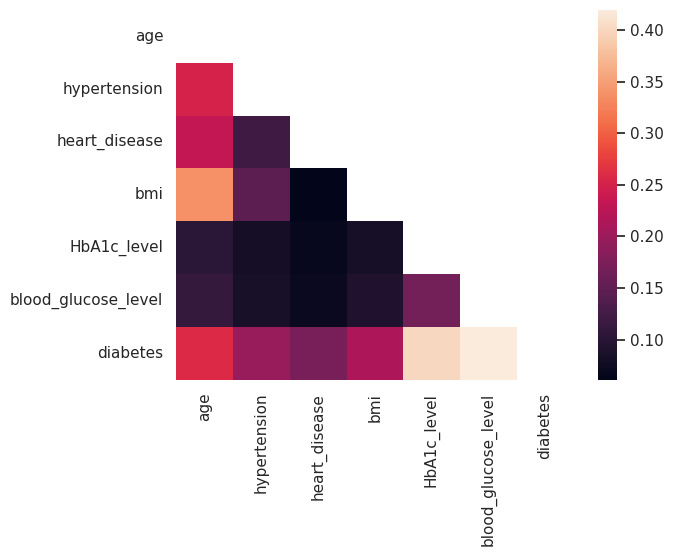

In [ ]:
mask = np.triu(np.ones_like(data.corr()))
# plotting a triangle correlation heatmap
sns.heatmap(data.corr(), mask=mask)


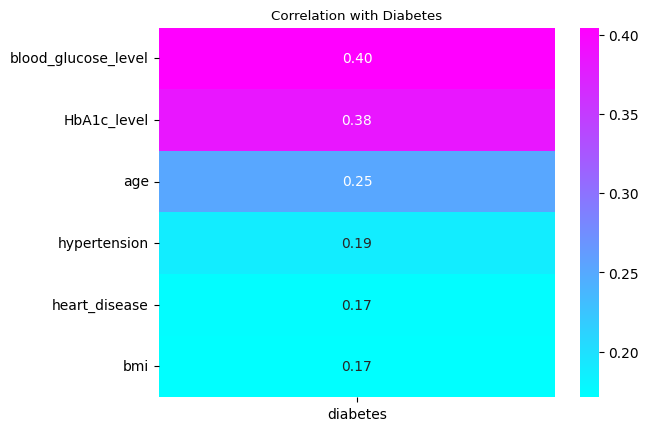

In [ ]:
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.heatmap(target_corr_sorted.to_frame(), cmap="cool", annot=True, fmt='.2f')

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("bright")
plt.title('Correlation with Diabetes')
plt.show()

# Preprocessing for ML Models

In [ ]:
# Check the unique values of all column
n = data.nunique(axis=0)
print("No.of unique values in each column:\n", n)

No.of unique values in each column:
 gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           3
bmi                    2380
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
weight_type               4
initial_diagnosis         3
sugar_test                3
dtype: int64


In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'weight_type',
       'initial_diagnosis', 'sugar_test'],
      dtype='object')

In [ ]:
#To check data types & unique values
d = []
u = []
t = []
for col in data:
    d.append(col)
    u.append(data[col].nunique())
    t.append(data[col].dtype)
pd.DataFrame({'column':d,'type': t ,'unique value' : u})

column     type  unique value
0                gender   object             2
1                   age  float64           102
2          hypertension    int64             2
3         heart_disease    int64             2
4       smoking_history   object             3
5                   bmi  float64          2380
6           HbA1c_level  float64            18
7   blood_glucose_level    int64            18
8              diabetes    int64             2
9           weight_type   object             4
10    initial_diagnosis   object             3
11           sugar_test   object             3

In [ ]:
# Move last Column to First Column
data = data.reindex(columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'weight_type',
       'initial_diagnosis', 'sugar_test', 'diabetes'])


In [ ]:
data.sample(4)

### Label Encoding

In [ ]:
# Separate Numerical & Categorical columns
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'smoking_history', 'weight_type', 'initial_diagnosis',
       'sugar_test'],
      dtype='object')
Numerical Variables:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [ ]:
data.weight_type.value_counts()

overweight     45760
obesity        23875
normal         21828
underweight     8519
Name: weight_type, dtype: int64

In [ ]:
#Performing (ordinal) feature mapping
#data['weight_type'] = data['weight_type'].replace(('underweight','normal','overweight','obesity'),(1,2,3,4))

In [ ]:
## Categorical (Ordinal) feature encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['weight_type_enc']=le.fit_transform(data['weight_type'])
data['initial_diagnosis_enc']=le.fit_transform(data['initial_diagnosis'])
data['sugar_test_enc']=le.fit_transform(data['sugar_test'])

In [ ]:
data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1      non-smoker  25.19   
1  Female  54.0             0              0      non-smoker  27.32   
2    Male  28.0             0              0      non-smoker  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes weight_type initial_diagnosis  \
0          6.6                  140         0  overweight          diabetes   
1          6.6                   80         0  overweight          diabetes   
2          5.7                  158         0  overweight       prediabetes   
3          5.0                  155         0      normal            normal   
4          4.8                  155         0      normal            normal   

  sugar_test  
0   diabetes  
1     normal  
2   diabetes  
3   diabetes  
4   diabetes

In [ ]:
data['sugar_test_enc'].value_counts()

0    64824
1    19806
2     6592
Name: sugar_test_enc, dtype: int64

### Dummy Encoding

In [ ]:
## Categorical (Nominal) feature e.g; 'gender', 'smoking_history'
#One hot encoding
x=pd.get_dummies(data['gender'])
data=pd.concat([data,x],axis=1)

In [ ]:
#Drop object columns
df = data.drop(['gender','smoking_history','weight_type','initial_diagnosis','sugar_test'],axis=1)

In [ ]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'weight_type_enc',
       'initial_diagnosis_enc', 'sugar_test_enc', 'Female', 'Male'],
      dtype='object')

In [ ]:
df1 = df.reindex(columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level','weight_type_enc',
       'initial_diagnosis_enc', 'sugar_test_enc', 'Female', 'Male','diabetes'])

In [ ]:
df1.columns = df1.columns.str.lower()

In [ ]:
df1.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'hba1c_level',
       'blood_glucose_level', 'weight_type_enc', 'initial_diagnosis_enc',
       'sugar_test_enc', 'female', 'male', 'diabetes'],
      dtype='object')

## Feature selection

In [ ]:
# Correlation matrix of label with features
corr = df1.corr()['diabetes'][df1.corr()['diabetes'] < 1].abs().sort_values(ascending=False)
corr

hba1c_level              0.348913
blood_glucose_level      0.227840
age                      0.224227
hypertension             0.172502
heart_disease            0.157104
bmi                      0.149421
sugar_test_enc           0.147270
initial_diagnosis_enc    0.147064
male                     0.039853
female                   0.039756
weight_type_enc          0.011782
Name: diabetes, dtype: float64

*  +1.0	Perfect positive + association
*  +0.8 to 1.0	Very strong + association
*  +0.6 to 0.8	Strong + association
*  +0.4 to 0.6	Moderate + association
*  +0.2 to 0.4	Weak + association
*  0.0 to +0.2	Very weak + or no association

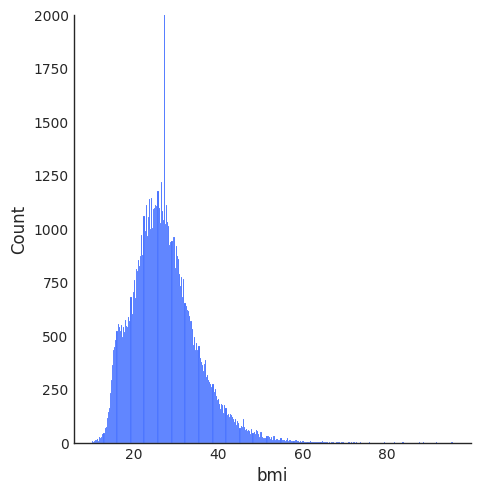

In [65]:
sns.displot(data=data, x='bmi').color = sns.color_palette()[7]
plt.ylim((0, 2000))
plt.title='BMI Histogram'

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
# After fitting the model, we input feature names
onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

NameError: ignored

In [ ]:
#Outlier Observation Analysis
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in data:

    Q1 = data.columns.quantile(0.25)
    Q3 = data.columns.quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if data[(data[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Pull out a specific subset of networks
used_networks = ['age', 'hypertension', 'heart_disease', 'bmi', 'hba1c_level',
       'blood_glucose_level', 'weight_type_enc', 'initial_diagnosis_enc',
       'sugar_test_enc', 'female', 'male', 'diabetes']
used_columns = (df1.columns.get_level_values("sugar_test_enc")
                          .astype(int64)
                          .isin(used_networks))

# Compute the correlation matrix and average over networks
corr_df = df1.corr().groupby(level="sugar_test_enc").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

## Checking label imbalance

In [ ]:
# Percentage of label values
counts = df1.diabetes.value_counts()
percs = df1.diabetes.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

count  percentage
0  85875    0.941385
1   5347    0.058615

The dataset is imbalanced (with 8% positive cases for diabetes and 92% negative cases), it's essential to balance the data to ensure that the model doesn't get biased towards the majority class. For this purpose, the Synthetic Minority Over-sampling Technique (SMOTE) is used, which generates synthetic samples for the minority class.

In [46]:
data.shape

(100000, 9)

In [37]:
#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format
# Define resampling
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [38]:
over

SMOTE(sampling_strategy=0.1)

In [39]:
under

RandomUnderSampler(sampling_strategy=0.5)

In [42]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [47]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

# Split data into features and target variable
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [48]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
clf = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RandomForestClassifier())])

In [49]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('over', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('classifier', RandomForestClassifier())])

In [ ]:
# Define the hyperparameters and the values we want to test
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

In [ ]:
# Convert GridSearchCV results to a DataFrame and plot
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='viridis')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

In [ ]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Splitting dataset

In [ ]:
#lets extract features and label column
X=df1.drop(columns=['diabetes'])
y=df1['diabetes']

In [ ]:
X.head()

age  hypertension  heart_disease    bmi  hba1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   weight_type_enc  initial_diagnosis_enc  sugar_test_enc  female  male  
0                2                      0               0       1     0  
1                2                      0               1       1     0  
2                2                      2               0       0     1  
3                0                      1               0       1     0  
4                0                      1               0       0     1

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [ ]:
#Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,shuffle=True)

# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (72991, 11)
X_test shape: (18248, 11)
Y_train shape: (72991,)
Y_test shape: (18248,)


## Scaling

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# numerical features
num_cols = ['age','bmi','blood_glucose_level']

# apply standardization on numerical features
for i in num_cols:

    # fit on training data column
    scale = StandardScaler().fit(X_train[[i]])

    # transform the training data column
    X_train[i] = scale.transform(X_train[[i]])

    # transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])

In [ ]:
X_train.describe().T

count          mean       std       min       25%  \
age                    63867.0  1.691053e-17  1.000008 -1.836223 -0.822036   
hypertension           63867.0  6.698295e-02  0.249994  0.000000  0.000000   
heart_disease          63867.0  3.635680e-02  0.187178  0.000000  0.000000   
bmi                    63867.0  5.785182e-18  1.000008 -2.373117 -0.602673   
hba1c_level            63867.0  5.489423e+00  1.045605  3.500000  4.800000   
blood_glucose_level    63867.0 -3.698066e-16  1.000008 -1.549139 -0.984952   
weight_type_enc        63867.0  1.420076e+00  0.939890  0.000000  1.000000   
initial_diagnosis_enc  63867.0  1.215870e+00  0.751316  0.000000  1.000000   
sugar_test_enc         63867.0  3.633645e-01  0.614168  0.000000  0.000000   
female                 63867.0  5.809103e-01  0.493414  0.000000  0.000000   
male                   63867.0  4.189488e-01  0.493391  0.000000  0.000000   

                            50%       75%       max  
age                    0.018695  0.770928  1.700158  
hypertension           0.000000  0.000000  1.000000  
heart_disease          0.000000  0.000000  1.000000  
bmi                    0.204862  0.403168  2.490493  
hba1c_level            5.800000  6.200000  9.000000  
blood_glucose_level    0.143422  0.651191  2.964358  
weight_type_enc        2.000000  2.000000  3.000000  
initial_diagnosis_enc  1.000000  2.000000  2.000000  
sugar_test_enc         0.000000  1.000000  2.000000  
female                 1.000000  1.000000  1.000000  
male                   0.000000  1.000000  1.000000

# Data Modelling

## Logistic Regression

In [ ]:
###Classification Models
##Logistic Regression
#Training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     28277
           1       0.57      0.85      0.69      1718

    accuracy                           0.96     29995
   macro avg       0.78      0.91      0.83     29995
weighted avg       0.97      0.96      0.96     29995

Accuracy =  95.54  %


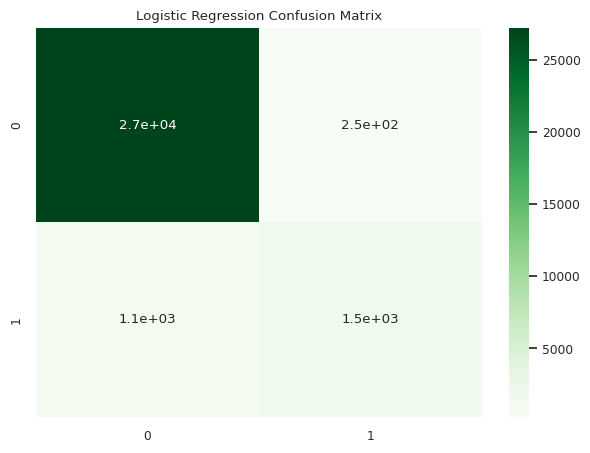

In [ ]:
#Evaluating the model
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = lr.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

lr_train_acc = round(accuracy_score(y_train,lr.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ',lr_test_acc ,' %')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Greens')
plt.title('Logistic Regression Confusion Matrix');

## K-Nearest-Neighbour

In [ ]:
###K-Nearest-Neighbour
##Training the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     28153
           1       0.58      0.80      0.67      1842

    accuracy                           0.95     29995
   macro avg       0.78      0.88      0.82     29995
weighted avg       0.96      0.95      0.96     29995

Accuracy =  95.2  %


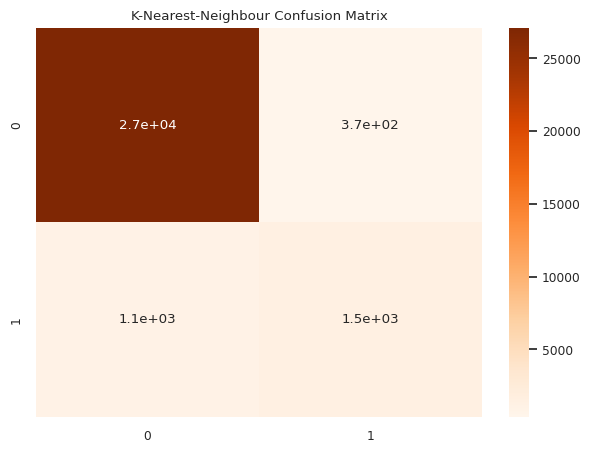

In [ ]:
#Evaluating the model
y_pred = knn.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

knn_train_acc = round(accuracy_score(y_train,knn.predict(X_train))*100,2)
knn_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ',knn_test_acc ,' %')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Oranges')
plt.title('K-Nearest-Neighbour Confusion Matrix');

## Naive Bayes

In [ ]:
##Naive Bayes
#Training the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.69      1.00      0.82     19029
           1       0.98      0.23      0.37     10966

    accuracy                           0.72     29995
   macro avg       0.84      0.61      0.59     29995
weighted avg       0.80      0.72      0.65     29995

Accuracy =  71.59  %


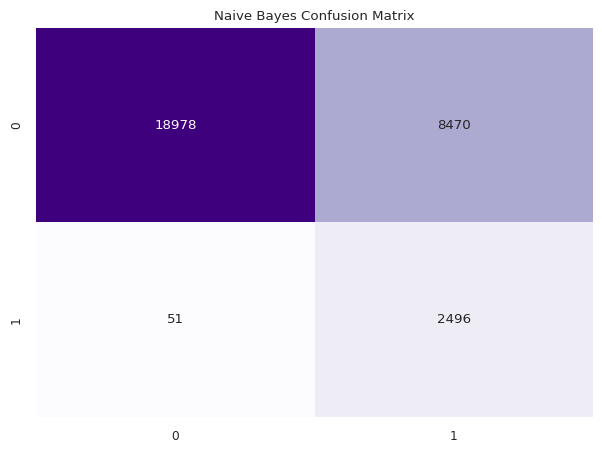

In [ ]:
#Evaluating the model
y_pred = nb.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_test, y_pred)
nb_train_acc = round(accuracy_score(y_train,nb.predict(X_train))*100,2)
nb_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , nb_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Purples', cbar=False,)
plt.title('Naive Bayes Confusion Matrix');

## Decision Tree

In [ ]:
##Decision Tree
#Training the model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     27337
           1       0.74      0.71      0.72      2658

    accuracy                           0.95     29995
   macro avg       0.85      0.84      0.85     29995
weighted avg       0.95      0.95      0.95     29995

Accuracy =  95.16  %


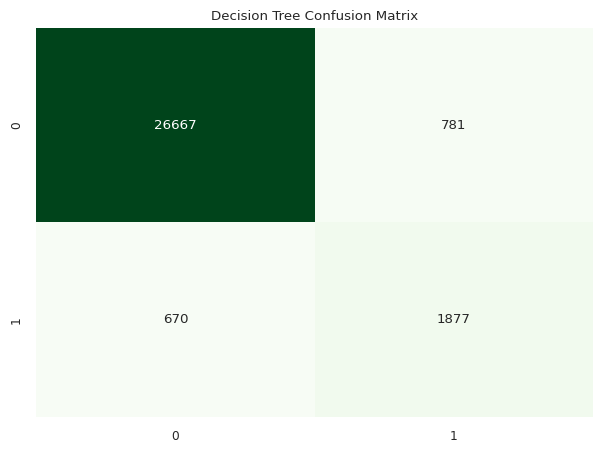

In [ ]:
#Evaluating the model
y_pred = tree.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_test, y_pred)
tree_train_acc = round(accuracy_score(y_train,tree.predict(X_train))*100,2)
tree_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , tree_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Greens', cbar=False,)
plt.title('Decision Tree Confusion Matrix');

##Random Forest

In [ ]:
##Random Forest
#Training the model
from sklearn.ensemble import RandomForestClassifier
rdm_frst = RandomForestClassifier(n_estimators=100)
rdm_frst.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     28021
           1       0.70      0.91      0.79      1974

    accuracy                           0.97     29995
   macro avg       0.85      0.94      0.89     29995
weighted avg       0.97      0.97      0.97     29995

Accuracy =  96.85  %


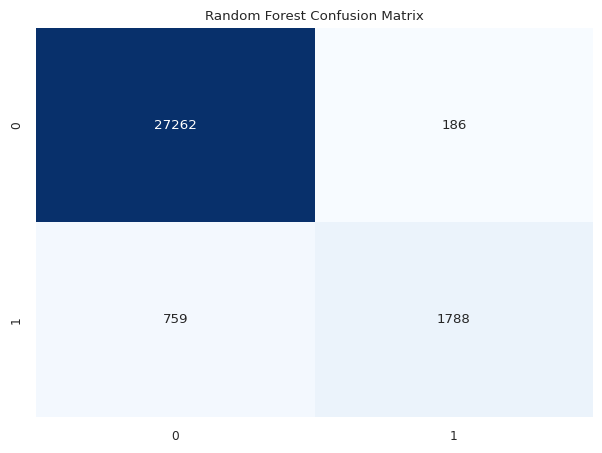

In [ ]:
#Evaluating the model
y_pred = rdm_frst.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_test, y_pred)
rdm_train_acc = round(accuracy_score(y_train,rdm_frst.predict(X_train))*100,2)
rdm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , rdm_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Random Forest Confusion Matrix');

#Comparing Classification Models

In [ ]:
###Comparing Classification Models
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','K Nearest Neighbors','Gaussian Naive Bayes','Decision Tree',
        'Random Forest'],
    'Training Accuracy': [
        lr_train_acc,knn_train_acc,nb_train_acc,tree_train_acc,rdm_train_acc],
    'Model Accuracy Score': [
       lr_test_acc,knn_test_acc,nb_test_acc,tree_test_acc,rdm_test_acc
    ]})
models.sort_values(by='Training Accuracy', ascending=False)

Model  Training Accuracy  Model Accuracy Score
3         Decision Tree              99.84                 95.16
4         Random Forest              99.84                 96.85
1   K Nearest Neighbors              96.98                 95.20
0   Logistic Regression              95.47                 95.54
2  Gaussian Naive Bayes              71.68                 71.59

In [ ]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='Oranges_r')

# 5. statistical test

In [ ]:
data.columns

In [ ]:
# Sort the data
data.sort_values(by=['age','HbA1c_level', 'blood_glucose_level'], inplace=True)

In [ ]:
data.head(10)